# Read_cubefile

This notebook opens the GLaIL cubefiles for 18H and 36H, GRD and SIR and displays them.
It also does a quick check for which layers are populated.  

N.B. AMSRE-E was launched in 2002, so there are a lot of masked layers at the beginning of the year if you look at 2002 
data.

In [1]:
%pylab notebook
import glob
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import sys

Populating the interactive namespace from numpy and matplotlib


In [13]:
%cd /work/PMESDR/v1.3/AQUA_AMSRE/N/cubes_GLaIL
%ls -las

/work/PMESDR/v1.3/AQUA_AMSRE/N/cubes_GLaIL
total 46967616
   128 drwxrwsr-x 2 brodzik moha2290grp     65536 Aug 18 10:37 ./
     0 drwxrwsr-x 9 brodzik moha2290grp       512 Aug 18 09:50 ../
  1600 -rw-rw-r-- 1 brodzik moha2290grp   1626590 Aug 18 10:05 CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.3.2002.Incidence_angle.nc
  8032 -rw-rw-r-- 1 brodzik moha2290grp   8204926 Aug 18 09:52 CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.3.2002.TB.nc
  2944 -rw-rw-r-- 1 brodzik moha2290grp   2993102 Aug 18 09:52 CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.3.2002.TB_num_samples.nc
  6656 -rw-rw-r-- 1 brodzik moha2290grp   6805360 Aug 18 10:05 CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.3.2002.TB_std_dev.nc
   416 -rw-rw-r-- 1 brodzik moha2290grp    419023 Aug 18 09:52 CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.3.2002.TB_time.nc
  2592 -rw-rw-r-- 1 brodzik moha2290grp   2648585 Aug 18 10:06 CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.3.2003.Incidence_angle.nc
 14368 -rw-rw-r-- 1 brodzi

In [14]:
list = sort(glob.glob("*2003.TB.nc"))
list

array(['CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.3.2003.TB.nc',
       'CETB.cubefile.GLaIL.AQUA_AMSRE-18H-SIR-RSS-v1.3.2003.TB.nc',
       'CETB.cubefile.GLaIL.AQUA_AMSRE-18V-GRD-RSS-v1.3.2003.TB.nc',
       'CETB.cubefile.GLaIL.AQUA_AMSRE-18V-SIR-RSS-v1.3.2003.TB.nc',
       'CETB.cubefile.GLaIL.AQUA_AMSRE-36H-GRD-RSS-v1.3.2003.TB.nc',
       'CETB.cubefile.GLaIL.AQUA_AMSRE-36H-SIR-RSS-v1.3.2003.TB.nc',
       'CETB.cubefile.GLaIL.AQUA_AMSRE-36V-GRD-RSS-v1.3.2003.TB.nc',
       'CETB.cubefile.GLaIL.AQUA_AMSRE-36V-SIR-RSS-v1.3.2003.TB.nc'],
      dtype='<U58')

In [15]:
def read_cube_layer(file, varname, i):
    fid = Dataset(file, "r", "NETCDF4")
    data = fid.variables[varname][i,:,:]
    print(data.shape, np.amin(data), np.amax(data))
    fid.close()
    return data

In [16]:
layer_index = 61
d18h = read_cube_layer(list[1], "TB", layer_index)
d36h = read_cube_layer(list[5], "TB", layer_index)

(484, 408) 89.009995 261.83
(968, 816) 122.31 266.49


In [17]:
# This step is only needed if you know the beginning of the year has a lot of missing data
#for i in np.arange(0,730,40):  # or whatever steps you want to take through the cube
#    data = read_cube_layer(file, "TB", i)
#    print("i=%d, min=%f, max=%f" % (i, np.amin(data), np.amax(data)))
    

<IPython.core.display.Javascript object>


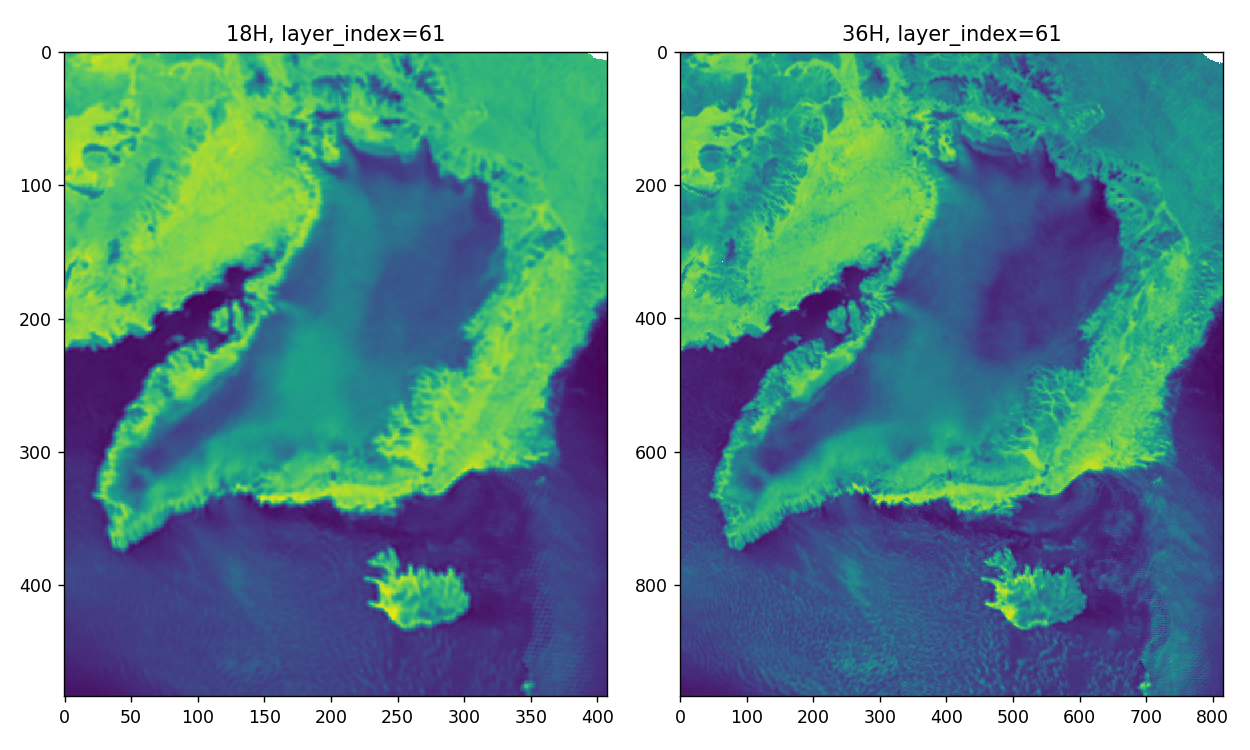

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax[0].imshow(d18h)
ax[0].set_title("18H, layer_index=%d" % layer_index)
ax[1].imshow(d36h)
ax[1].set_title("36H, layer_index=%d" % layer_index)
fig.tight_layout()

# Look at 18H and 36H data for GRD and SIR, doy = 721 (index=720)

In [23]:
list = sort(glob.glob("*H-*2003.TB.nc"))
list

array(['CETB.cubefile.GLaIL.AQUA_AMSRE-18H-GRD-RSS-v1.3.2003.TB.nc',
       'CETB.cubefile.GLaIL.AQUA_AMSRE-18H-SIR-RSS-v1.3.2003.TB.nc',
       'CETB.cubefile.GLaIL.AQUA_AMSRE-36H-GRD-RSS-v1.3.2003.TB.nc',
       'CETB.cubefile.GLaIL.AQUA_AMSRE-36H-SIR-RSS-v1.3.2003.TB.nc'],
      dtype='<U58')

<IPython.core.display.Javascript object>


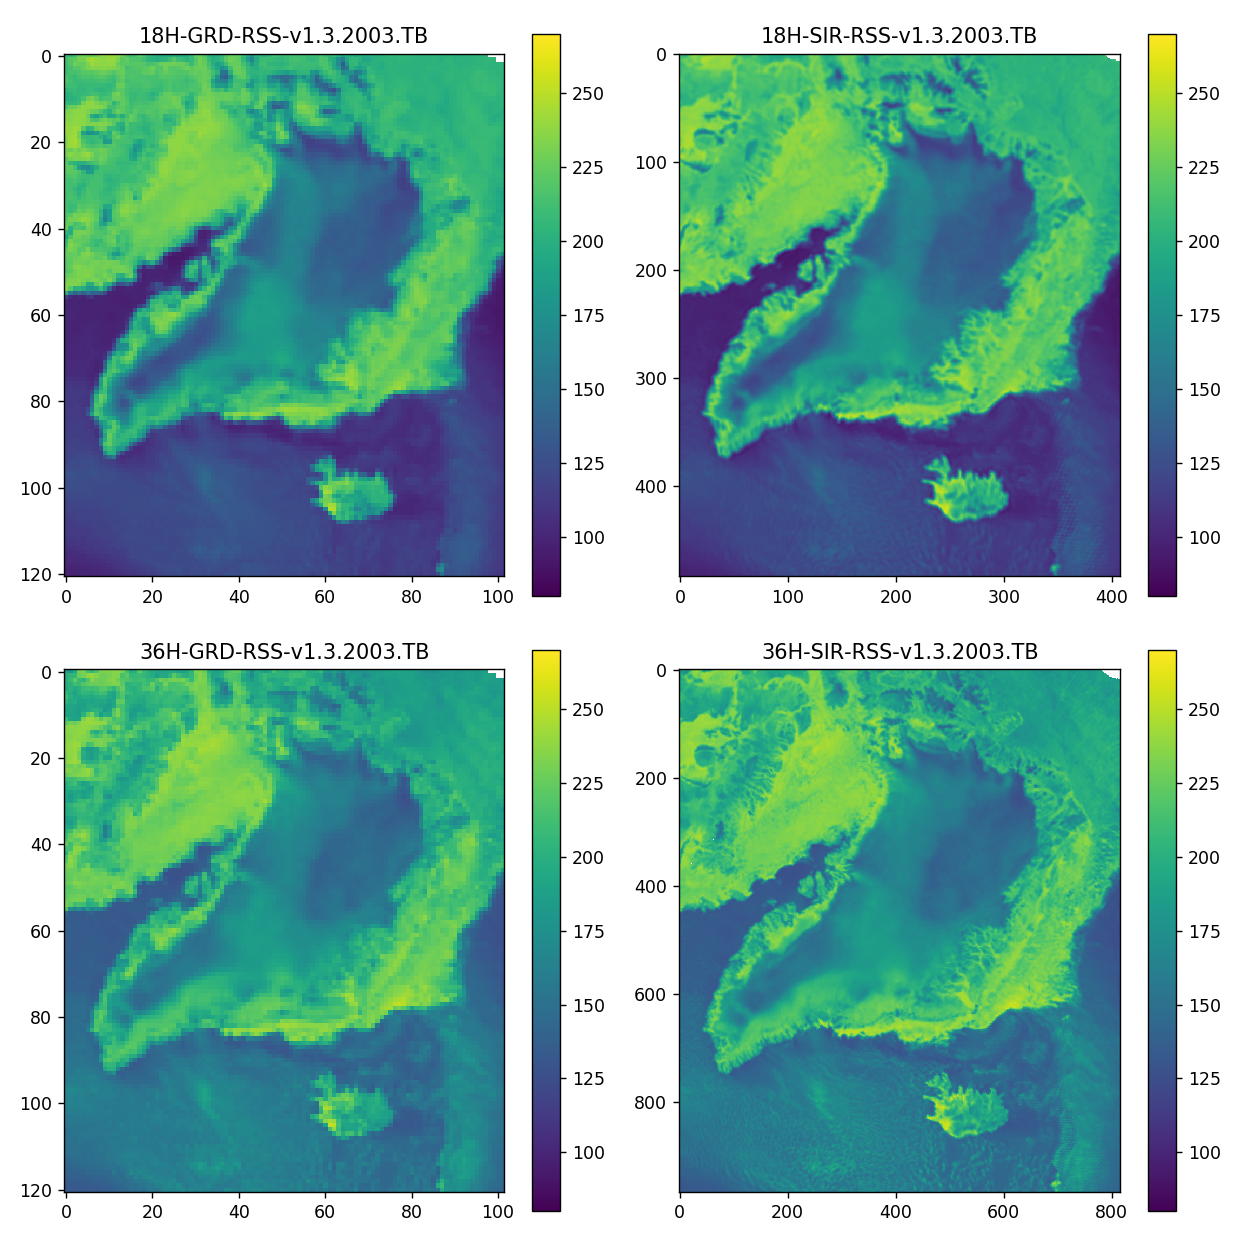

(121, 102) 91.97 248.01999
(484, 408) 89.009995 261.83
(121, 102) 125.95 252.79999
(968, 816) 122.31 266.49


In [26]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for j in np.arange(0,4):
    this_ax = ax[int(j/2), mod(j,2)]
    data = read_cube_layer(list[j], "TB", layer_index)
    img = this_ax.imshow(data, vmin=80, vmax=270)
    fig.colorbar(img, ax=this_ax)
    this_ax.set_title(list[j][-27:-3])
fig.tight_layout()